# Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

# Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.



# Feature details:
1. age
2. sex - 1 = male; 0 = female
3. cp- chest pain type (4 value) The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps- resting blood pressure
5. chol- serum cholestoral in mg/dl
6. fbs- fasting blood sugar > 120 mg/dl ( 1 = true; 0 = false)
7. restecg - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no) [based on excercise]
10. oldpeak - ST depression induced by exercise relative to rest [stress test of atleast 2mm]
11. slope - the slope of the peak exercise ST segment [0 upslope, 1 flat, 2 downslope]
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal- 1 = normal; 2 = fixed defect; 3 = reversable defect 
14. Target - 0=No, 1=Yes

# Importing libraries and performing prilimiary analysis

In [449]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [450]:
df=pd.read_csv('heart.csv')
df.head()

<IPython.core.display.Javascript object>

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [451]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Observation: Many features and encoded and a few have continous data. Target variable being 0 and 1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
round(((df.target.value_counts()/df.shape[0])*100),2)

1    54.46
0    45.54
Name: target, dtype: float64

### observation: Balanced Dataset w.r.t target variable

In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Observation: There are no null values and the size of dataset is 303 rows with 14 features.

### Data Exploration to draw insights

In [3]:
sns.pairplot(data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

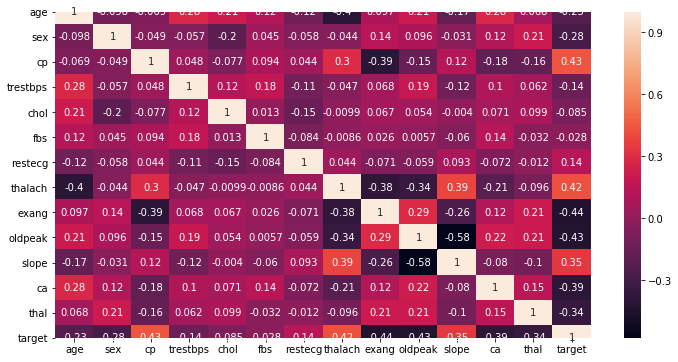

In [22]:
plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

#### Inference: We can see no much multicollinearity between the features and target variable is partially related to a few features

age


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

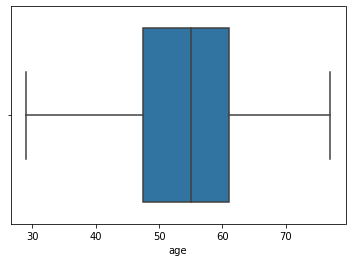

sex


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

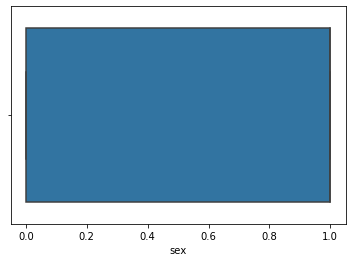

cp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

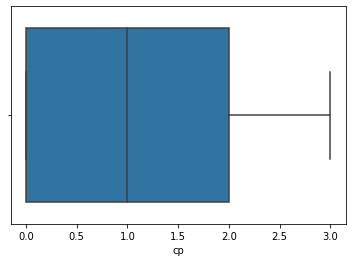

trestbps


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

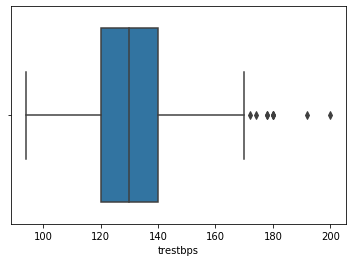

chol


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

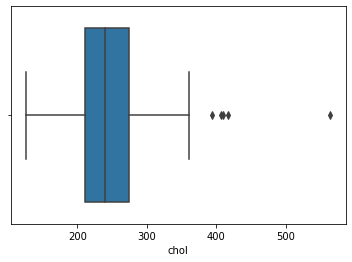

fbs


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

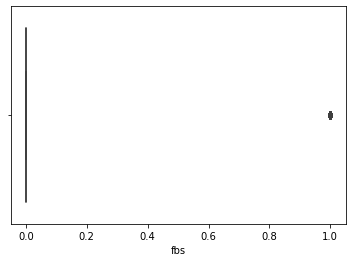

restecg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

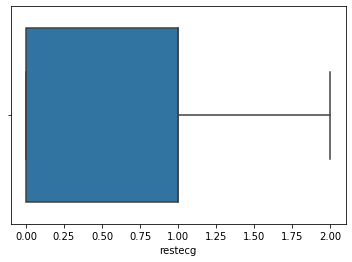

thalach


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

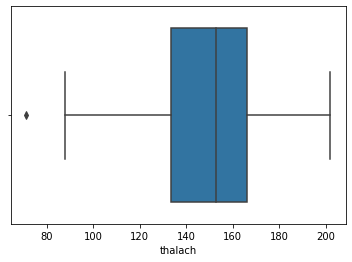

exang


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

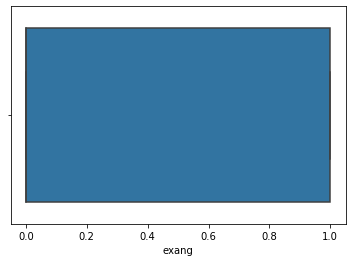

oldpeak


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

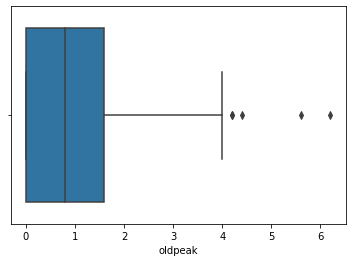

slope


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

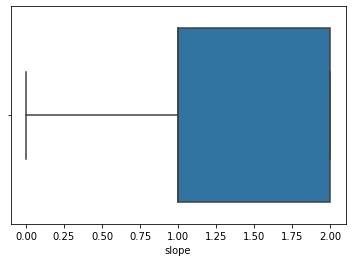

ca


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

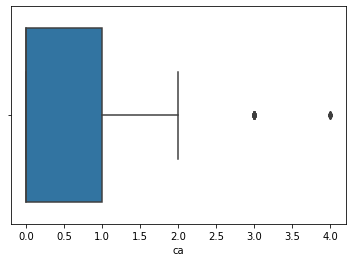

thal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

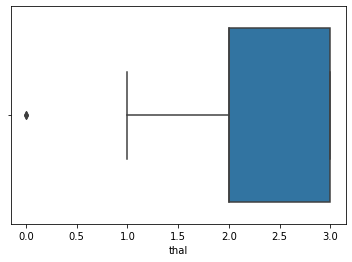

target


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

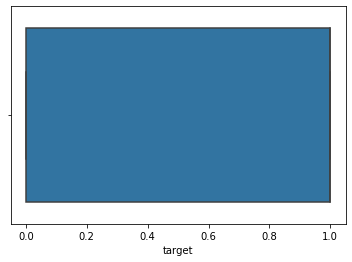

In [9]:
for col in df.columns:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [4]:
#Observation: Few of the features are lightly skewed which is common as high bp, cholestrol and peaks are bund to arrive

<IPython.core.display.Javascript object>

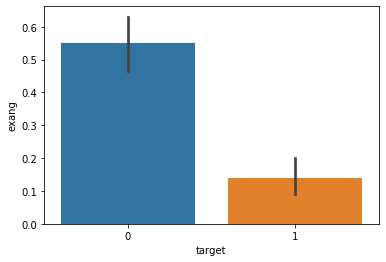

In [109]:
sns.barplot(df.target, df.exang)

#### Inference: Heart disease is less in people who don't stress their heart with powerful exercise

<IPython.core.display.Javascript object>

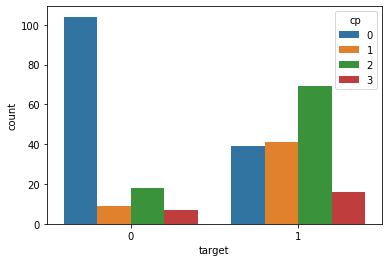

In [110]:
sns.countplot(df.target, hue=df.cp)

#### Inference: Chest pain type 0 maximum indicates no major heart disease while 2 majorly prone to heart disease.

<IPython.core.display.Javascript object>

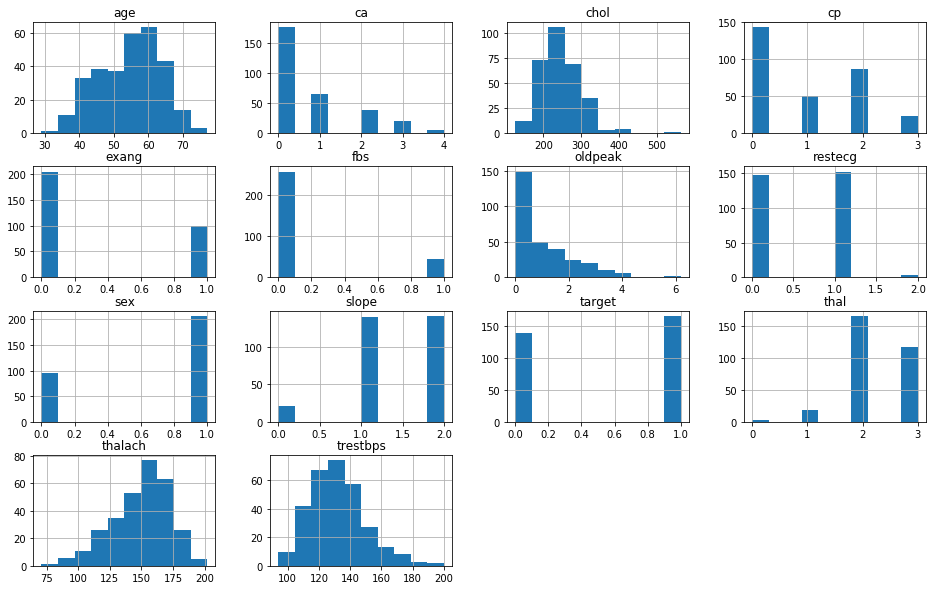

In [11]:
df.hist(figsize=(16,10))
plt.show()

#### Observation: Clear descrete caps can be seen in age feature. Gaussian distribution can be seen in 'chol'. Skewed features to be treated

In [452]:
#Converting them to perform one hot encoding for categrical values
df.cp=df.cp.map({3:'asymptomatic',2:'non-anginal',1:'atypical',0:'typical'}).astype(object)
df.slope=df.slope.map({2:'down_slope',1:'flat',0:'up_Slope'}).astype(object)
df.restecg=df.restecg.map({2:'ventrical_abnormal',1:'wave_abnormal',0:'normal'}).astype(object)
df.thal=df.thal.map({3:'reversable_defect',2:'fixed_defect',1:'normal'}).astype(object)

In [453]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,up_Slope,0,normal,1
1,37,1,non-anginal,130,250,0,wave_abnormal,187,0,3.5,up_Slope,0,fixed_defect,1
2,41,0,atypical,130,204,0,normal,172,0,1.4,down_slope,0,fixed_defect,1
3,56,1,atypical,120,236,0,wave_abnormal,178,0,0.8,down_slope,0,fixed_defect,1
4,57,0,typical,120,354,0,wave_abnormal,163,1,0.6,down_slope,0,fixed_defect,1


In [454]:
df=pd.get_dummies(df, drop_first=True)
df.head()

<IPython.core.display.Javascript object>

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical,cp_non-anginal,cp_typical,restecg_ventrical_abnormal,restecg_wave_abnormal,slope_flat,slope_up_Slope,thal_normal,thal_reversable_defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,0,0,1,1,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,0,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,1,0,0,0,0


## Model Building

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import model_selection
x=df.drop('target',1)
y=df.target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=3)

In [456]:
LR=LogisticRegression()
kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
cv_results = model_selection.cross_val_score(LR, x, y,cv=kfold, scoring='roc_auc')
print('Accuracy:',round(np.mean(cv_results)*100,2),'%')
print('Variance Error:', round(np.std(cv_results)*100,2),'%')

lr.fit(X_train,y_train)
print(classification_report(y_test,lr.predict(X_test)))
print(confusion_matrix(y_test,lr.predict(X_test)))

<IPython.core.display.Javascript object>

Accuracy: 91.0 %


<IPython.core.display.Javascript object>

Variance Error: 1.17 %
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.95      0.92        40

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61

[[16  5]
 [ 2 38]]


<IPython.core.display.Javascript object>

AUC Accuracy: 0.9392857142857143


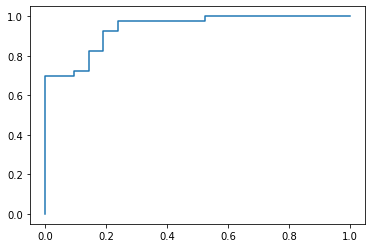

In [457]:
y_prob=lr.predict_proba(X_test)
y_prob=y_prob[:,-1]
fpr, tpr, th= roc_curve(y_test, y_prob)
plt.plot(fpr,tpr)
print('AUC Accuracy:', roc_auc_score(y_test, y_prob))

### Observations: False negative value is only 2 and overall 7 wrong predictions with 89% accuracy. ROC_AUC curve cover maximum area too. We can try using ensemble algorithms for better results

In [458]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold
params={'criterion':['gini','entropy'],
       'n_estimators': range(2,15,2),
       'max_depth': range(1,10)}
rf=RandomForestClassifier(random_state=2)
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
model=GridSearchCV(rf, params, cv=kfold, scoring='roc_auc')
model.fit(X_train,y_train)
print('best parametrs are:', model.best_params_)

best parametrs are: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 12}


In [459]:
rf=RandomForestClassifier(criterion='gini',max_depth=2,n_estimators=12, random_state=2)
kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
cv_results = model_selection.cross_val_score(rf,x, y,cv=kfold, scoring='roc_auc')
print('Accuracy:', round(np.mean(cv_results)*100,2),'%')
print('Variance error:', round(np.std(cv_results)*100,2),'%')

rf.fit(X_train,y_train)
print()
print(classification_report(y_test,rf.predict(X_test)))
print(confusion_matrix(y_test,rf.predict(X_test)))

<IPython.core.display.Javascript object>

Accuracy: 89.4 %


<IPython.core.display.Javascript object>

Variance error: 0.84 %

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.90      0.93      0.91        40

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.89      0.88        61

[[17  4]
 [ 3 37]]


<IPython.core.display.Javascript object>

0.9345238095238095

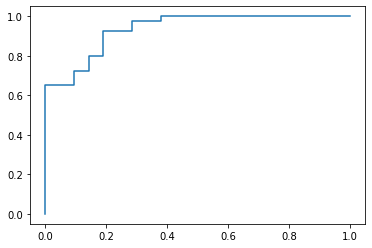

In [460]:
y_prob=rf.predict_proba(X_test)
y_prob=y_prob[:,-1]
fpr, tpr, th= roc_curve(y_test, y_prob)
plt.plot(fpr,tpr)
roc_auc_score(y_test, y_prob)

In [461]:
Ada=AdaBoostClassifier(base_estimator=LR,n_estimators=15,random_state=0)
kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
cv_results = model_selection.cross_val_score(Ada, x, y,cv=kfold, scoring='roc_auc')
print('Accuracy:', round(np.mean(cv_results)*100,2),'%')
print('Variance error:', round(np.std(cv_results)*100,2),'%')

Ada.fit(X_train,y_train)
print()
print(classification_report(y_test,Ada.predict(X_test)))
print(confusion_matrix(y_test,Ada.predict(X_test)))

<IPython.core.display.Javascript object>

Accuracy: 90.87 %


<IPython.core.display.Javascript object>

Variance error: 1.97 %

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.89      0.97      0.93        40

    accuracy                           0.90        61
   macro avg       0.91      0.87      0.89        61
weighted avg       0.91      0.90      0.90        61

[[16  5]
 [ 1 39]]


<IPython.core.display.Javascript object>

0.9369047619047619

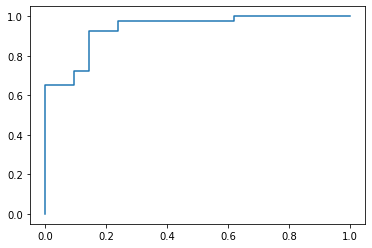

In [462]:
y_prob=Ada.predict_proba(X_test)
y_prob=y_prob[:,-1]
fpr, tpr, th= roc_curve(y_test, y_prob)
plt.plot(fpr,tpr)
roc_auc_score(y_test, y_prob)

In [468]:
models = []
models.append(('Logistic', lr))
models.append(('RandomForest',rf))
models.append(('AdaBoost', Ada))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Logistic:Accuracy 0.910011 Variance Error(0.011743)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForest:Accuracy 0.894031 Variance Error(0.008399)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AdaBoost:Accuracy 0.908656 Variance Error(0.019659)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

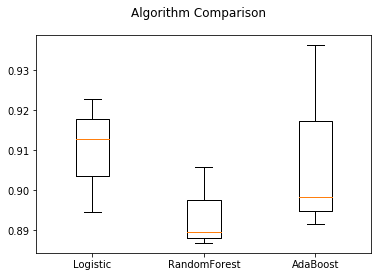

In [474]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, x, y,cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s:Accuracy %f Variance Error(%f)" % (name, np.mean(cv_results), np.std(cv_results)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Inference: We are Choosing Ada Boost boosting technique with Logistic regression algorithm to predict  data in future and ensembling techniques will work well with unseen data.  Logistic Regression was boosted to increase performance by bringing a trade off between bias and variance.  

### Model shows 90% accuarcy with only 1 False negative classified . The AUC score 93.69 which works well in terms of health care domain.

# Let's explore neural network to find good model

In [463]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [464]:
X=df.drop('target',1).values
y=df.target.values
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=.2, random_state=0)

In [465]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [441]:
ann=Sequential()

In [442]:
ann.add(Dense(units=10, activation='relu',input_dim=18))
ann.add(Dropout(.2))

In [443]:
ann.add(Dense(units=10,activation='relu',input_dim=18))
ann.add(Dropout(.2))

In [444]:
ann.add(Dense(units=1, activation='sigmoid'))

In [445]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )

In [448]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, ypred))
confusion_matrix(y_test, ypred)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



array([[24,  3],
       [ 4, 30]], dtype=int64)

### Inference - Artificial Neural network gave us 83% accuracy for training and 89 for testing data with 4 False negative prediction. Although ML model gave us good area under curve, adapting NN is not so bad.